In [110]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Ruter_data.csv', sep=";")
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [97]:
def dateforward(text):
    """Last day of the month, or month of the year, not taken into account.
    This would simply have been done using e.g. the datetime-library in python
    """

    d,m,y = [int(n) for n in text.split("/")]
    d += 1
    return f"{d}/{m}/{y}"

def delay_time(df, col_faktisk, col_planlagt):
    """
    Finding delay between planned and actual arrival-/departure-times. Creates a list
    of delay in minutes for the chosen columns, and returns None if no correct time-format is found, and
    returns the row-indeces.
    """
    indeces_without_timestamp = []
    t_diffs = []
    for index, row in df.iterrows():
        t_faktisk = row[col_faktisk].split(":")
        t_planlagt = row[col_planlagt].split(":")
        try:
            t_diff = [(int(t_faktisk[0])-int(t_planlagt[0]))*60, int(t_faktisk[1])-int(t_planlagt[1]), (int(t_faktisk[2])-int(t_planlagt[2]))/60]
            t_diff = round(sum(t_diff), 1)
            t_diffs.append(t_diff)
        except:
            t_diffs.append(None)
            indeces_without_timestamp.append((index, row))
            
    return t_diffs, indeces_without_timestamp

diff_ankomst, none_index_ankomst = delay_time(df, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra', 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra')
diff_avgang, none_index_avgang = delay_time(df, 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra', 'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra')
waiting_times, none_index_wt = delay_time(df, 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra', 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra')



Text(0.5, 0, 'Time, minutes')

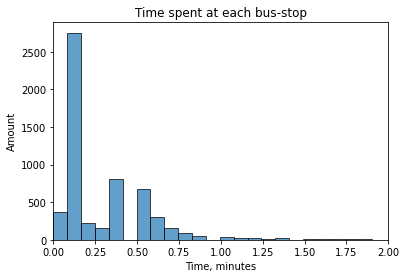

In [109]:
# Plotting distribution of time spent between arrival and departure

plot = plt.hist([i for i in waiting_times if i is not None], alpha=0.7, bins=250, edgecolor='black')
plt.xlim([0, 2])
plt.title("Time spent at each bus-stop")
plt.ylabel("Amount")
plt.xlabel("Time, minutes")

Text(0.5, 1.0, 'Trips distributed by municipality')

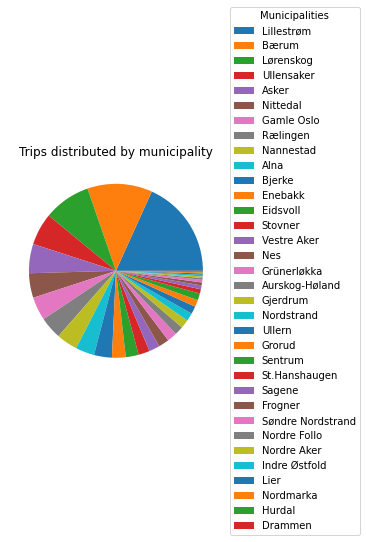

In [104]:

df['Kommune'].value_counts()
fix, ax = plt.subplots()

wedges, texts = ax.pie(df['Kommune'].value_counts())
ax.legend(wedges, df.Kommune.value_counts().keys(),
          title="Municipalities",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Trips distributed by municipality")


Text(0.5, 1.0, 'Trips distributed by Areas')

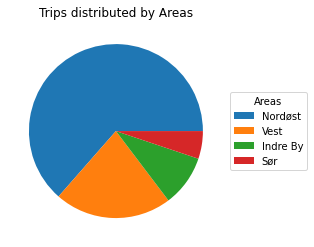

In [105]:
df['Område'].value_counts()
fix, ax = plt.subplots()
wedges, texts = ax.pie(df['Område'].value_counts())

ax.legend(wedges, df.Område.value_counts().keys(),
          title="Areas",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Trips distributed by Areas")

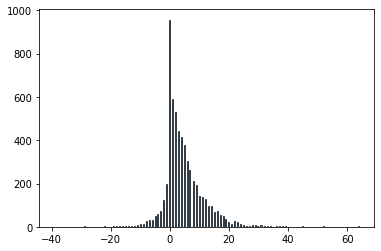

In [100]:
plot = plt.hist(df.Passasjerer_Ombord, alpha=0.7, bins=300, edgecolor='black')

Text(0.5, 0, 'Time, minutes')

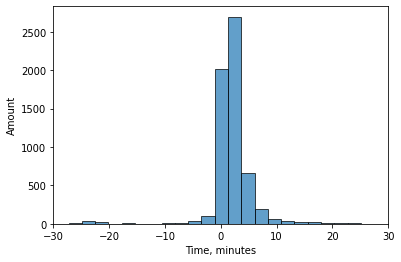

In [108]:
plot = plt.hist([i for i in diff_avgang if i is not None], alpha=0.7, bins=300, edgecolor='black')

plt.xlim([-30, 30])
plt.ylabel("Amount")
plt.xlabel('Time, minutes')

Text(0.5, 0, 'Time, minutes')

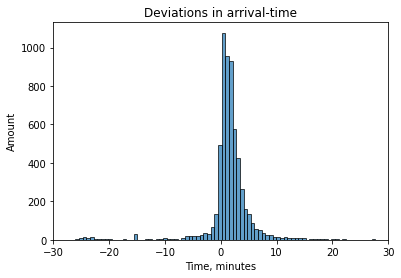

In [106]:
plot = plt.hist([i for i in diff_ankomst if i is not None], alpha=0.7, bins=300, edgecolor='black')
plt.xlim([-30, 30])
plt.title("Deviations in arrival-time")
plt.ylabel("Amount")
plt.xlabel("Time, minutes")